In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Dataset
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
# Creating Bucket
df['Taxable.Income']=pd.cut(df['Taxable.Income'], bins=[0,30000,99619], labels=['Risky','Good'])

In [8]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [9]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [10]:
#label Encoding
le=LabelEncoder()
df['Taxable.Income']=le.fit_transform(df['Taxable.Income'])
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Urban']=le.fit_transform(df['Urban'])

In [11]:
# Get Dummies
df1=pd.get_dummies(df['Marital.Status'])
df2=pd.concat([df,df1],axis=1)
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,0,Single,0,50047,10,1,0,0,1
1,1,Divorced,0,134075,18,1,1,0,0
2,0,Married,0,160205,30,1,0,1,0
3,1,Single,0,193264,15,1,0,0,1
4,0,Married,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,Divorced,0,39492,7,1,1,0,0
596,1,Divorced,0,55369,2,1,1,0,0
597,0,Divorced,0,154058,0,1,1,0,0
598,1,Married,0,180083,17,0,0,1,0


In [12]:
#Droping columns
df2.drop(columns=['Marital.Status'],inplace=True)

In [13]:
df2

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,0,0,50047,10,1,0,0,1
1,1,0,134075,18,1,1,0,0
2,0,0,160205,30,1,0,1,0
3,1,0,193264,15,1,0,0,1
4,0,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...,...
595,1,0,39492,7,1,1,0,0
596,1,0,55369,2,1,1,0,0
597,0,0,154058,0,1,1,0,0
598,1,0,180083,17,0,0,1,0


In [16]:
# Assigning x and y variables
x=pd.concat([df2.iloc[:,0:1],df2.iloc[:,2:8]],axis=1)
y=df2.iloc[:,1]


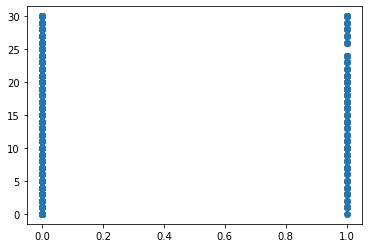

In [42]:
plt.scatter(df2['Taxable.Income'],df2['Work.Experience'])

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

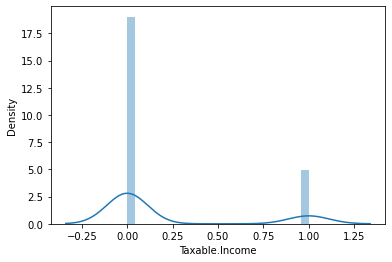

In [43]:
sns.distplot(df2['Taxable.Income'])

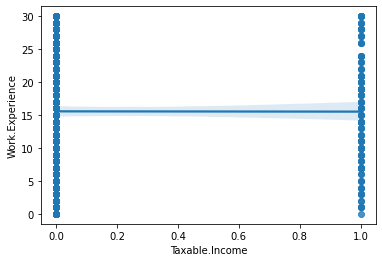

In [44]:
sns.regplot(x="Taxable.Income", y="Work.Experience", data=df2);

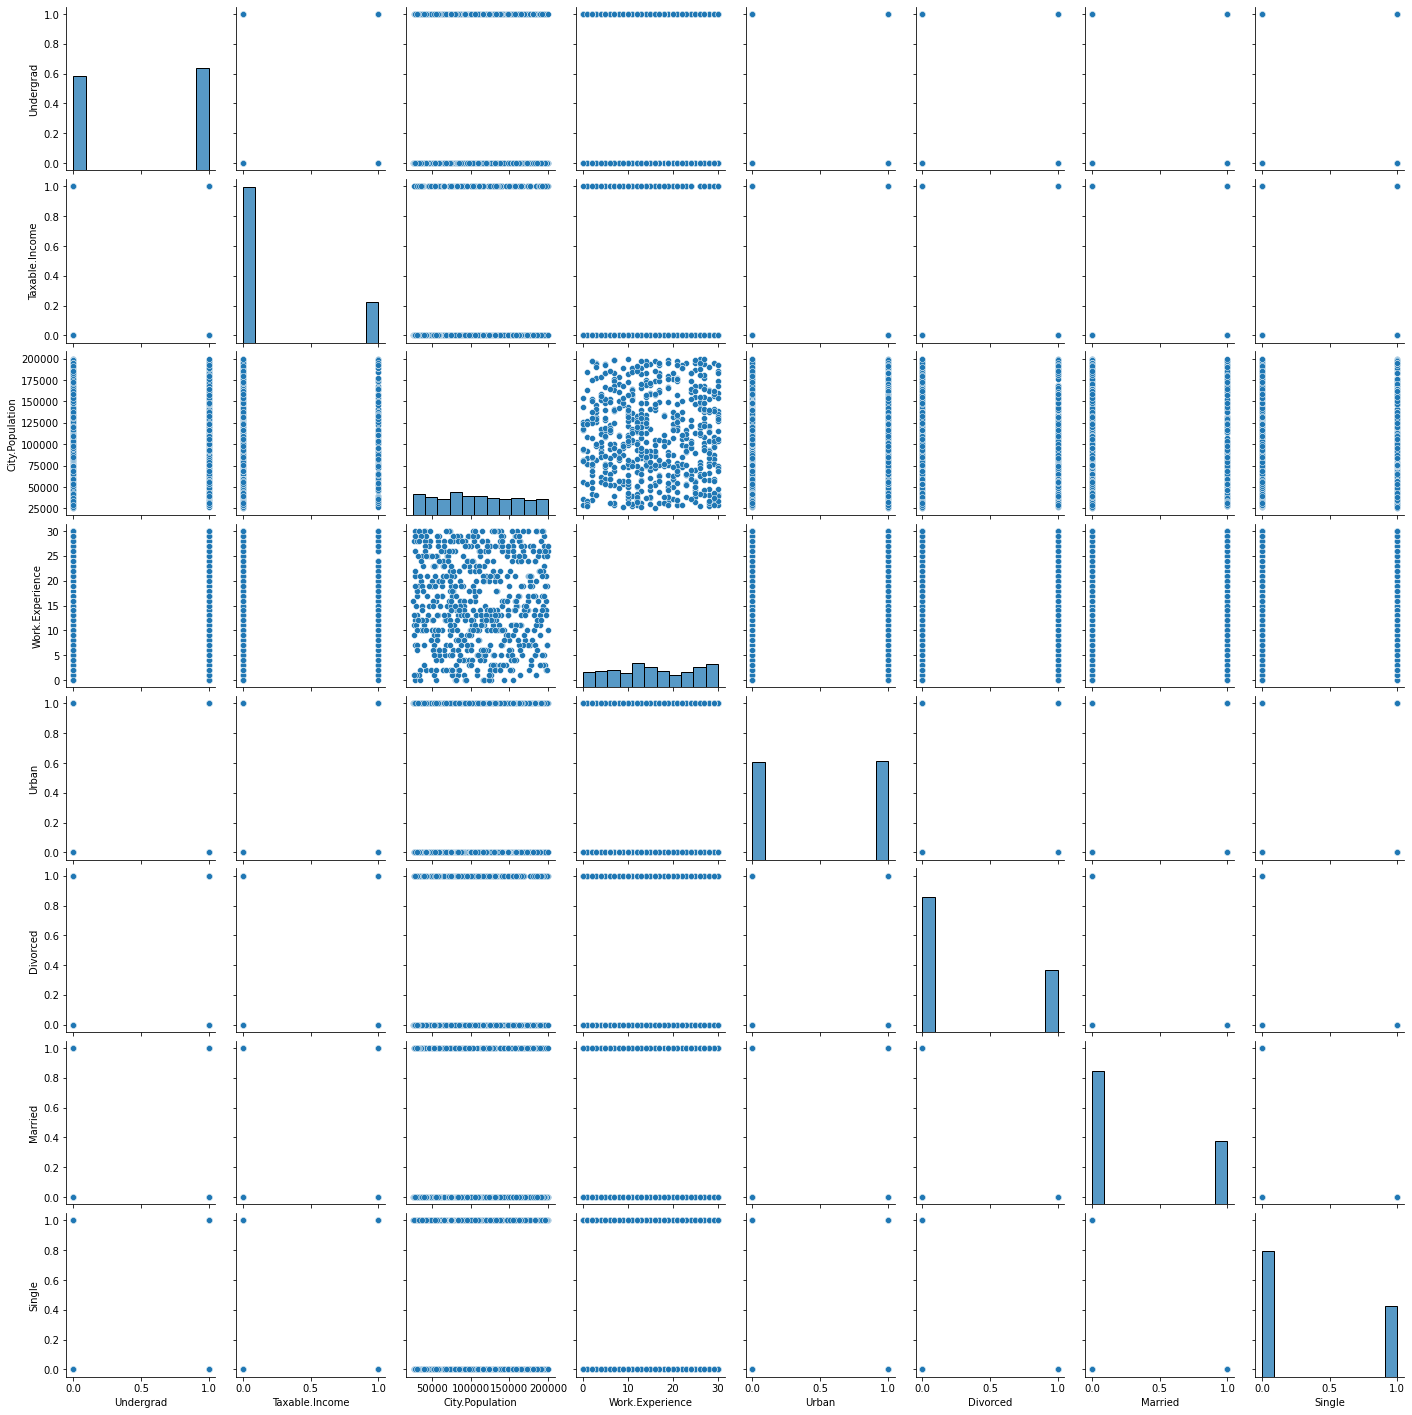

In [45]:
sns.pairplot(df2)

# Model Building

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [27]:
model=DecisionTreeClassifier(max_depth=3)

In [28]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

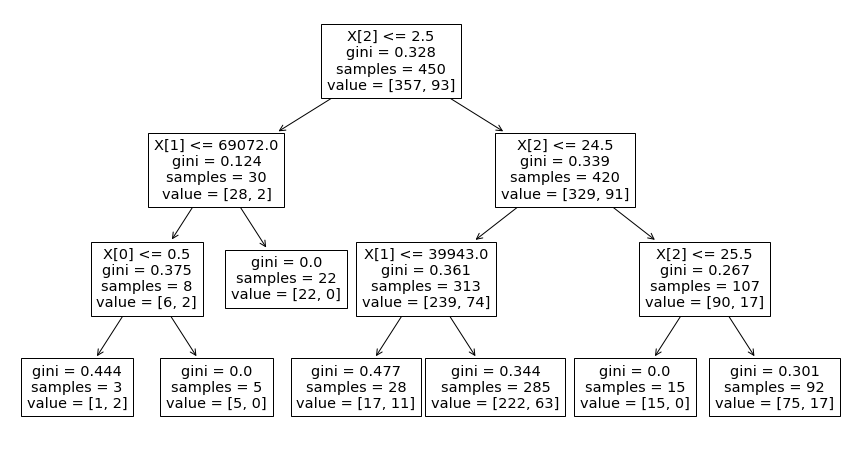

In [29]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(model)
plt.show()

In [30]:
y_pred=model.predict(xtest)

In [31]:
trainac=model.score(xtrain,ytrain)
testac=model.score(xtest,ytest)

print(f"Training Accuracy {trainac} \n Testing Accuracy { testac}")

Training Accuracy 0.7955555555555556 
 Testing Accuracy 0.7733333333333333


# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameter={ 'criterion':['entropy','gini'],
           'max_depth':[1,2,3,4,5],
           'random_state':[1,10,100,1000],
           'max_features':['auto','sqrt','log2']
    
    
}

In [34]:
cv=GridSearchCV(model,param_grid=parameter,cv=5,scoring='accuracy')

In [35]:
cv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 10, 100, 1000]},
             scoring='accuracy')

In [36]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 'auto',
 'random_state': 1}

In [37]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=1,max_features='auto',random_state=1)

In [38]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features='auto',
                       random_state=1)

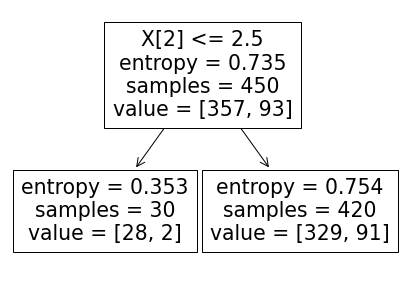

In [39]:
plt.figure(figsize=(7,5))
tree.plot_tree(model2)
plt.show()

In [40]:
y_pred2=model2.predict(xtest)

In [41]:
trainac=model2.score(xtrain,ytrain)
testac=model2.score(xtest,ytest)
print(f"Testing Accuracy {trainac}\nTesting Accuracy {testac}")

Testing Accuracy 0.7933333333333333
Testing Accuracy 0.7933333333333333
